In [48]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt
from astropy.io import fits
cmap_map = 'plasma'

In [49]:
fn_gcathi = f'/home/Aruna/Downloads/quaia_G20.5.fits'
fn_selhi = f"/home/Aruna/Downloads/selection_function_NSIDE64_G20.5.fits"
fn_randhi = f'/home/Aruna/Downloads/random_G20.5_10x.fits'
CMB_MV = f'/home/Aruna/Downloads/PR4_variations/PR42018like_klm_dat_MV.fits'
CMB_MV1  = f'/home/Aruna/Downloads/PR4_variations/PR42018like_klm_mf_MV.fits'
CMB_PP1 = f'/home/Aruna/Downloads/PR4_variations/PR42018like_klm_dat_PP.fits'
CMB_PP2 =f'/home/Aruna/Downloads/PR4_variations/PR42018like_klm_mf_PP.fits'
CMB_TT1 =f'/home/Aruna/Downloads/PR4_variations/PR42018like_klm_dat_TT.fits'
CMB_TT2 =f'/home/Aruna/Downloads/PR4_variations/PR42018like_klm_mf_TT.fits'
CMB_Mask = f'/home/Aruna/Downloads/PR4_variations/mask.fits'

In [50]:
G_hi = 20.5
NSIDE = 64

In [72]:
mask_planck = hp.read_map(CMB_Mask, dtype=bool)
print(hp.npix2nside(len(mask_planck)))
mask_planck = hp.pixelfunc.ud_grade(mask_planck, NSIDE)
print(hp.npix2nside(len(mask_planck)))

2048
64


# Planck Lensing Mask

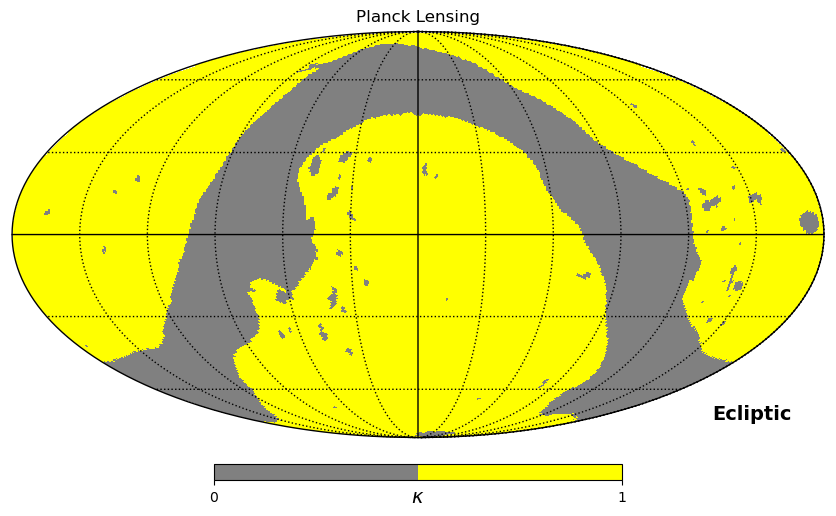

In [113]:
hp.mollview(mask_planck, title="Planck Lensing", unit=r"$\kappa$",
            cmap=cmap, coord=['G', 'E'], badcolor='none', bgcolor='white'
)
hp.graticule()


In [51]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

49152


In [52]:
tab_gcathi = Table.read(fn_gcathi)
tab_CMB_MV = Table.read(CMB_MV)
tab_CMB_MV1 = Table.read(CMB_MV1)
tab_CMB_PP1 = Table.read(CMB_PP1)
tab_CMB_PP2 = Table.read(CMB_PP2)
tab_CMB_TT1 = Table.read(CMB_TT1)
tab_CMB_TT2 = Table.read(CMB_TT2)
tab_CMB_Mask = Table.read(CMB_Mask)
N_gcathi = len(tab_gcathi)
print(f"Number of data sources: {N_gcathi}")

Number of data sources: 1295502


In [53]:
print(f"Column names: {tab_gcathi.columns}")
print(f"Column names: {tab_CMB_MV.columns}")
print(f"Column names: {tab_CMB_MV1.columns}")
print(f"Column names: {tab_CMB_PP1.columns}")
print(f"Column names: {tab_CMB_PP2.columns}")
print(f"Column names: {tab_CMB_TT1.columns}")
print(f"Column names: {tab_CMB_TT2.columns}")
print(f"Column names: {tab_CMB_Mask.columns}")

Column names: <TableColumns names=('source_id','unwise_objid','redshift_quaia','redshift_quaia_err','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','mag_w1_vg','mag_w2_vg','pm','pmra','pmdec','pmra_error','pmdec_error')>
Column names: <TableColumns names=('index','real','imag')>
Column names: <TableColumns names=('index','real','imag')>
Column names: <TableColumns names=('index','real','imag')>
Column names: <TableColumns names=('index','real','imag')>
Column names: <TableColumns names=('index','real','imag')>
Column names: <TableColumns names=('index','real','imag')>
Column names: <TableColumns names=('T')>


# Quaia Redshift Bin1

In [54]:
#Redshift_bin1
redshift_bin1_quasar = tab_gcathi[tab_gcathi['redshift_quaia']< 1.0]
print('Found {0} in high redshift sample (z < 1.0)'.format(redshift_bin1_quasar))
print(f"Column names: {redshift_bin1_quasar.columns}")

Found      source_id        unwise_objid   ...  pmra_error pmdec_error
                                     ...   mas / yr    mas / yr 
------------------- ---------------- ... ----------- -----------
      6459630980096 0453p000o0014479 ...   0.6794193   0.6087985
     31026843960576 0453p000o0017859 ...   0.8461047   0.6411056
     35115652874752 0453p000o0020193 ...  0.22700854  0.22789434
     58377195752192 0453p000o0020346 ...  0.50546354   0.5524559
     83116207389824 0453p000o0020877 ... 0.074871786  0.06970348
     84456237175680 0453p000o0020456 ...  0.87478703  0.69656646
                ...              ... ...         ...         ...
6917378192686370816 3146m016o0030729 ...   1.1908576    0.568886
6917387740397472896 3146p000o0002559 ...   0.5625827  0.32216662
6917405813620286976 3146m016o0032039 ...   0.5092364     0.38529
6917406706973136256 3146m016o0027284 ...   0.5903856   0.3295121
6917407394167929216 3146m016o0027794 ...   0.7439152   0.4850732
6917412754287240704

# Quaia Redshift Bin2

In [39]:
#Redshift_bin2
redshift_bin2_quasar = tab_gcathi[(tab_gcathi['redshift_quaia']>1.0) & (tab_gcathi['redshift_quaia']<2.3)]
print('Found {0} in high redshift sample (z < 1.0)'.format(redshift_bin2_quasar))
print(f"Column names: {redshift_bin2_quasar.columns}")

Found      source_id        unwise_objid   ... pmra_error pmdec_error
                                     ...  mas / yr    mas / yr 
------------------- ---------------- ... ---------- -----------
     10892037246720 0453p000o0015876 ...   0.257395  0.22310686
     15839839588736 0453p000o0017020 ... 0.36059502   0.3265819
     29102698617216 0453p000o0018124 ...  0.5716444   0.4993483
     47931835055360 0453p000o0020960 ... 0.37432006   0.3599602
     50714973862784 0453p000o0020867 ...  1.1354076   1.2071596
     54528905041920 0453p000o0019611 ... 0.21791558  0.21231827
                ...              ... ...        ...         ...
6917450412560019712 3161p000o0004805 ... 0.83976525  0.70854247
6917451069690723968 3146p000o0043809 ...  1.0566318  0.85448617
6917455600881764224 3146p000o0007503 ...  0.6087043   0.3890951
6917468485783290240 3146p000o0002653 ... 0.40439597  0.29020762
6917496076653451136 3146p000o0005900 ...  0.3839861  0.26361403
6917502467565029248 3146p000o00100

# Quaia Redshift Bin3

In [40]:
#Redshift_bin3
redshift_bin3_quasar = tab_gcathi[tab_gcathi['redshift_quaia']> 2.3]
print('Found {0} in high redshift sample (z < 1.0)'.format(redshift_bin3_quasar))
print(f"Column names: {redshift_bin3_quasar.columns}")

Found      source_id        unwise_objid   ... pmra_error pmdec_error
                                     ...  mas / yr    mas / yr 
------------------- ---------------- ... ---------- -----------
     19275813399552 0453p000o0024506 ... 0.73948723   0.6251052
     22780506725760 0453p000o0016209 ... 0.36143935    0.269473
     45389214407424 0453p000o0019307 ...  0.3681689   0.3576673
     52158083142400 0453p000o0027329 ...  0.6254234  0.69609946
     56075093274240 0453p000o0019945 ... 0.36981297   0.3769708
     57208964633216 0453p000o0019560 ... 0.64339066   0.7235434
                ...              ... ...        ...         ...
6917284111426926336 3146m016o0017936 ... 0.31727818  0.21123376
6917353758617076224 3146m016o0040472 ... 0.49994504  0.33512285
6917368876902244864 3146m016o0042522 ...  1.9320492   0.7576222
6917404645389088000 3146m016o0030992 ... 0.97004604  0.66675234
6917497176165136640 3146p000o0006694 ... 0.28860968  0.21269144
6917516211458848000 3146p000o00099

In [55]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

In [56]:
pixel_indices_redshift_bin1_quasar = hp.ang2pix(NSIDE, redshift_bin1_quasar['ra'], redshift_bin1_quasar['dec'], lonlat=True)
map_redshift_bin1_quasar = np.bincount(pixel_indices_redshift_bin1_quasar, minlength=NPIX)

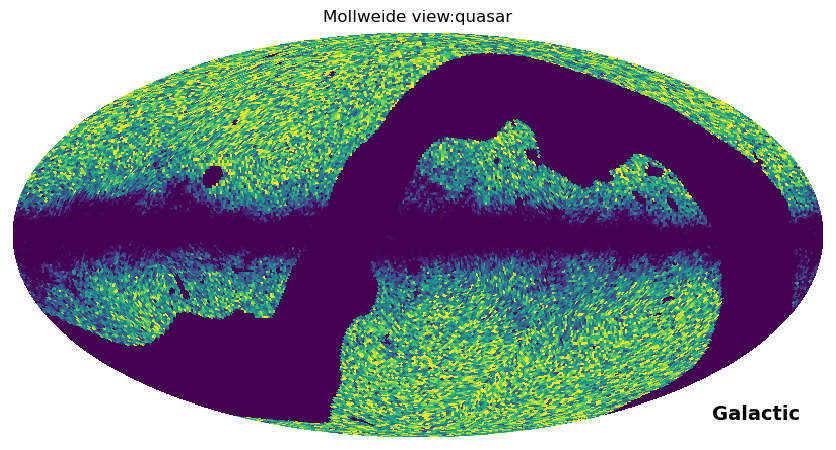

In [109]:
 hp.visufunc.mollview(map=map_redshift_bin1_quasar*mask_planck, fig=None, rot=None, coord=['C', 'G'], unit='', xsize=800, title='Mollweide view:quasar', nest=False, min=np.median(map_redshift_bin1_quasar)-1.5*np.std(map_redshift_bin1_quasar), max=np.median(map_redshift_bin1_quasar)+1.5*np.std(map_redshift_bin1_quasar), flip='astro', remove_dip=False, remove_mono=False, gal_cut=0, format='%g', format2='%g', cbar=None, cmap=None, notext=False, norm=None, alpha=None)

In [58]:
pixel_indices_CMB_MV = hp.ang2pix(NSIDE, tab_CMB_MV['real'], tab_CMB_MV['imag'], lonlat=True)
map_CMB_MV = np.bincount(pixel_indices_CMB_MV, minlength=NPIX)

pixel_indices_CMB_MV1 = hp.ang2pix(NSIDE, tab_CMB_MV1['real'], tab_CMB_MV1['imag'], lonlat=True)
map_CMB_MV1 = np.bincount(pixel_indices_CMB_MV1, minlength=NPIX)

pixel_indices_CMB_PP1 = hp.ang2pix(NSIDE, tab_CMB_PP1['real'], tab_CMB_PP1['imag'], lonlat=True)
map_CMB_PP1 = np.bincount(pixel_indices_CMB_PP1, minlength=NPIX)

pixel_indices_CMB_PP2 = hp.ang2pix(NSIDE, tab_CMB_PP2['real'], tab_CMB_PP2['imag'], lonlat=True)
map_CMB_PP2 = np.bincount(pixel_indices_CMB_PP2, minlength=NPIX)

pixel_indices_CMB_TT1 = hp.ang2pix(NSIDE, tab_CMB_TT1['real'], tab_CMB_TT1['imag'], lonlat=True)
map_CMB_TT1 = np.bincount(pixel_indices_CMB_TT1, minlength=NPIX)

pixel_indices_CMB_TT2 = hp.ang2pix(NSIDE, tab_CMB_TT2['real'], tab_CMB_TT2['imag'], lonlat=True)
map_CMB_TT2 = np.bincount(pixel_indices_CMB_TT2, minlength=NPIX)

# pixel_indices_CMB_Mask = hp.ang2pix(NSIDE, tab_CMB_Mask['T'],phi=False, lonlat=True)
# map_CMB_Mask = np.bincount(pixel_indices_CMB_Mask, minlength=NPIX)

In [61]:
maps_names_to_include = [map_CMB_MV, map_CMB_MV1, map_CMB_PP1, map_CMB_PP2, map_CMB_TT1, map_CMB_TT2, map_redshift_bin1_quasar]
maps_dict = {}
for i, map_value in enumerate(maps_names_to_include, start=1):
    maps_dict[f"map_{i}"] = map_value